In [82]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\vaib9\OneDrive\Desktop\Vaibhav\mymoviedb.csv", engine='python')

# Drop columns (SAVE changes)
df = df.drop(['Overview','Poster_Url','Original_Language'], axis=1)

# Convert to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year
df['Release_Year'] = df['Release_Date'].dt.year

# Convert Release_Year to int (SAVE changes)
df['Release_Year'] = df['Release_Year'].astype('Int64')

# #drop Release_Date column
# df=df.drop(['Release_Date'], axis=1)


# df.info()
# Check
#converting str to numeric
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

#assigning popularity stages with respect to the vote average
condition = [
    df['Vote_Average'] >= 8,
    (df['Vote_Average']>=6) & (df['Vote_Average']<=8),
    (df['Vote_Average']>=4) & (df['Vote_Average']<=6),
    (df['Vote_Average']<=4)
]

choices = ['High Popular','Popular','Less Popular','Not Popular']

df['Popularity_Stage'] = np.select(condition,choices,default='Unknown')


#count of popularity stages
df['Popularity_Stage'].value_counts()
# df.head()

Popularity_Stage
Popular         6823
Less Popular    2388
High Popular     436
Not Popular      179
Unknown           11
Name: count, dtype: int64

In [63]:
#removing null values if exists
df.dropna(inplace=True)

df.isna().sum()

Title               0
Popularity          0
Vote_Count          0
Vote_Average        0
Genre               0
Release_Year        0
Popularity_Stage    0
dtype: int64

In [83]:
df['Genre'] = df['Genre'].fillna('').astype(str)
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

# Remove blank genres created from empty strings
df = df[df['Genre'] != '']

df


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year,Popularity_Stage
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action,2021,High Popular
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,2021,High Popular
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,2021,High Popular
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime,2022,High Popular
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery,2022,High Popular
...,...,...,...,...,...,...,...,...
25798,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,Drama,2021,Popular
25799,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,History,2021,Popular
25800,1984-09-23,Threads,13.354,186,7.8,War,1984,Popular
25801,1984-09-23,Threads,13.354,186,7.8,Drama,1984,Popular


In [78]:
#casting column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25792 entries, 0 to 25802
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Release_Date      25792 non-null  datetime64[ns]
 1   Title             25792 non-null  object        
 2   Popularity        25792 non-null  float64       
 3   Vote_Count        25792 non-null  object        
 4   Vote_Average      25792 non-null  float64       
 5   Genre             25792 non-null  object        
 6   Release_Year      25792 non-null  Int64         
 7   Popularity_Stage  25792 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(2), object(4)
memory usage: 1.8+ MB


In [84]:
df.nunique()

Release_Date        5892
Title               9512
Popularity          8159
Vote_Count          3266
Vote_Average          74
Genre                 19
Release_Year         102
Popularity_Stage       4
dtype: int64

In [81]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year,Popularity_Stage
0,Spider-Man: No Way Home,5083.954,8940,8.3,Action,2021,High Popular
1,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,2021,High Popular
2,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,2021,High Popular
3,The Batman,3827.658,1151,8.1,Crime,2022,High Popular
4,The Batman,3827.658,1151,8.1,Mystery,2022,High Popular


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
# What is the most frequent genre of movie released on Netflix?
df['Genre'].describe()


count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

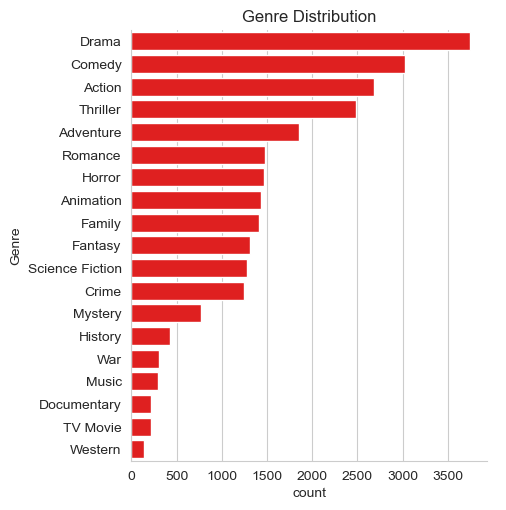

In [90]:
sns.catplot(y = 'Genre',data=df,kind = 'count',
            order = df['Genre'].value_counts().index,
           color = 'red')
plt.title("Genre Distribution")
plt.show()

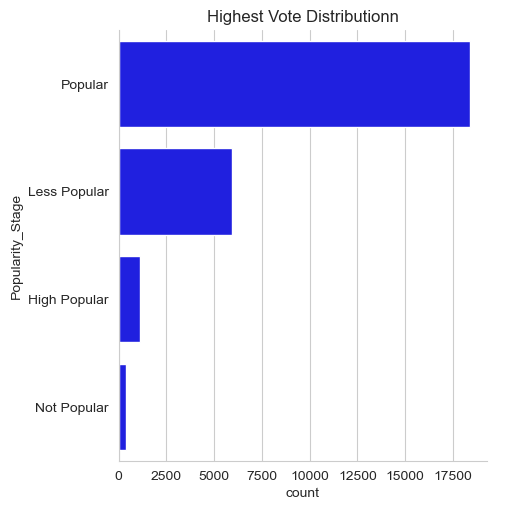

In [93]:
#which has the highest votes in the vote avg column?

sns.catplot(y = 'Popularity_Stage',data=df,kind = 'count',
            order = df['Popularity_Stage'].value_counts().index,
           color = 'blue')
plt.title("Highest Vote Distributionn")
plt.show()


In [94]:
# What movie got the highest popularity? whats its genre?
df[df['Popularity'] == df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year,Popularity_Stage
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action,2021,High Popular
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,2021,High Popular
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,2021,High Popular


In [95]:
# What movie got the lowest popularity? whats its genre?

df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year,Popularity_Stage
25797,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,Music,2021,Popular
25798,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,Drama,2021,Popular
25799,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,History,2021,Popular
25800,1984-09-23,Threads,13.354,186,7.8,War,1984,Popular
25801,1984-09-23,Threads,13.354,186,7.8,Drama,1984,Popular
25802,1984-09-23,Threads,13.354,186,7.8,Science Fiction,1984,Popular


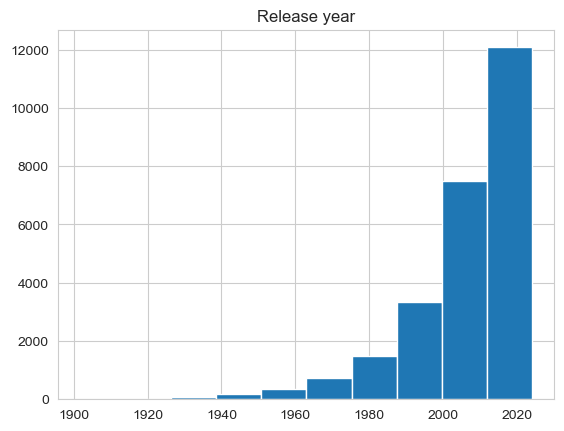

In [99]:
# Which year has the most filmed movies?
df['Release_Year'].hist()
plt.title("Release year")
plt.show()

In [ ]:
Conclusion

Q1: What is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres. ther

Q2: What genres has highest votes?

we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.51 movies

Q3: What movie got the highest popularity? what's its genre?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

Q3: What movie got the lowest popularity? what's its genre?

The united states, thread has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi and hi

Q4: Which year has the most filmmed movies?

year 2020 has the highest filmming rate in our dataset..

In [105]:
df.to_xml("Netflix Movie Analysis.xml", index=False)
print("done")

done
